# Assignment 1. Computation of journal bearing

It is possible to use the Reynolds equation to compute de eccentricity and the angle of a journal bearing with fluid film lubrication, given the load $W$

![image.png](Journal_bearing1.png)

Consider that the journal is displaced in the $x$ negative direction, so that $h(\theta) = h_0(1+\varepsilon \cos(\theta))$ where $\varepsilon=\frac{e}{h_0}$ is the relative eccentricity and $h_0 = \frac{1}{2}(D_b -D_a)$ is the average gap thickness. The journal is rotating in the positive direction of $\theta$ (polar coordinates)

![image.png](Journal_bearing2.png)

1. Calculate the pressure distribution $p(\theta)$ and the value and direction of $\mathbf{W}$, in the approximation $\varepsilon \ll 1$.
2. What happens to the journal if $\mathbf{W}$ increase a little bit?
3. Apply the results to this real [example](https://www.mcmaster.com/6658K738/), and discuss the value of the maximum load given by the manufactures at this rotational velocity.
![image.png](McMaster-Carr_JB.png)

----------------------------------
# A1: GROUP 1 SOLUTION
----------------------------------


## PART 1: $p(\theta)$ and $W$
----------------------------------

### 1.0. Importing sympy and numpy

In [1]:
%reset -f
import numpy as np
import sympy as sp

### 1.1. Introducing variables into sympy and context:

To work in a cylindric phase angle domain $\theta = [-\pi,+\pi]$ and addapt the cartesian Reynolds equation (with $R\sim \frac{R_a+R_b}{2}$):

- $$ h(x) \;\;\to\;\; h(\theta) $$
- $$ dx \;\;\to\;\; R \cdot d\theta $$
- $$ U \;\;\to\;\; \Omega \cdot R $$
- $$ p_x (x) \;\;\to\;\; \frac{dp}{dx} = \frac{dp}{R \cdot d\theta} = \frac{1}{R}p_\theta (\theta)$$

REYNOLDS: In cartesian domain: 

- $$ \dfrac{U \frac{d}{dx}h(x)}{2} - \dfrac{h^3(x) \frac{d}{dx} p_x (x)}{12 \mu} - \dfrac{h^2(x) p_x (x) \frac{d}{dx} h(x)}{4 \mu} = 0$$

REYNOLDS: Transformed to cylindrical domain:

- $$ \dfrac{\frac{U}{R} \frac{d}{d\theta}h(\theta)}{2} - \dfrac{ \frac{h^3(\theta)}{R^2} \frac{d}{d\theta} p_\theta (\theta)}{12 \mu} - \dfrac{\frac{h^2(\theta)}{R^2} p_\theta (\theta) \frac{d}{d\theta} h(\theta)}{4 \mu} = 0$$

- $$ \dfrac{\Omega \frac{d}{d\theta}h(\theta)}{2} - \dfrac{ h^3(\theta) \frac{d}{d\theta} p_\theta (\theta)}{12 R^2 \mu} - \dfrac{h^2(\theta) p_\theta (\theta) \frac{d}{d\theta} h(\theta)}{4 R^2 \mu} = 0 $$


MASS BALANCE: volumetric flow $q$ in cartesian domain:

- $$ q = \int_{0}^{h(x)} u(y) dy = \left( \dfrac{U}{2 h(x)}-\dfrac{h(x)p_x(x)}{4\mu}   \right)h^2(x)+\dfrac{h^3(x)p_x(x)}{6 \mu}$$

MASS BALANCE: volumetric flow $q$ transformed to cylindrical domain:

- $$ q = \left( \dfrac{\Omega R}{2 h(\theta)}-\dfrac{h(\theta)p_\theta(\theta)}{4 R\mu} \right)h^2(\theta)+\dfrac{h^3(\theta)p_\theta(\theta)}{6 R \mu} $$

1.1.1 VARIABLES:

In [2]:
# VARIABLES FOR REYNOLDS: 
theta,R,mu,Omega= sp.symbols('theta,R,mu,Omega', positive=True,real=True)
h = sp.Function('h')
p_theta = sp.Function('p_theta')




1.1.2 REYNOLDS EQUATION (unused):

In [3]:
ReynoldsLHS = Omega*h(theta).diff(theta)/2 - (h(theta))**3*p_theta(theta).diff(theta)/(12*R**2 * mu) - (h(theta))**2 * p_theta(theta)*h(theta).diff(theta)/(4*R**2 * mu)
ReynoldsEq = sp.Eq(ReynoldsLHS,0)
display(ReynoldsEq)

Eq(Omega*Derivative(h(theta), theta)/2 - h(theta)**3*Derivative(p_theta(theta), theta)/(12*R**2*mu) - h(theta)**2*p_theta(theta)*Derivative(h(theta), theta)/(4*R**2*mu), 0)

1.1.3 MASS BALANCE EQUATION (the volumetric flow "intU" for the lhs of $q$):

In [4]:
intU = (Omega*R/(2*h(theta))-h(theta)*p_theta(theta)/(4*R*mu))*(h(theta))**2+(h(theta))**3*p_theta(theta)/(6*R*mu)
display(intU)

(Omega*R/(2*h(theta)) - h(theta)*p_theta(theta)/(4*R*mu))*h(theta)**2 + h(theta)**3*p_theta(theta)/(6*R*mu)

In [5]:
intU=intU.simplify()
display(intU)

Omega*R*h(theta)/2 - h(theta)**3*p_theta(theta)/(12*R*mu)

### 1.2. GENERIC PRESSURE DISTRIBUTION

1.2.1 Solving the mass flow equation to get the partial pressure $p_\theta (\theta)$:

In [6]:
q = sp.symbols('q') # volumetric flow
exp_dpdtheta = sp.solve(intU-q,p_theta(theta))
display(exp_dpdtheta[0])

6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3

In [7]:
p_eq = sp.Eq(p_theta(theta), exp_dpdtheta[0])
display(p_eq)

Eq(p_theta(theta), 6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3)

1.2.2 Replacing the partial pressure $p_\theta(\theta)$ with its definition $\dfrac{dp}{d\theta}$ to get the pressure distribution:

In [8]:
p = sp.Function('p')
p_eq = p_eq.replace(p_theta(theta),p(theta).diff(theta))
display(p_eq)

Eq(Derivative(p(theta), theta), 6*R*mu*(Omega*R*h(theta) - 2*q)/h(theta)**3)

In [9]:
sp.dsolve(p_eq,p(theta))

Eq(p(theta), C1 + 6*R*mu*(Omega*R*Integral(h(theta)**(-2), theta) - 2*q*Integral(h(theta)**(-3), theta)))

### 1.3. APPLYING GEOMETRY OF JOURNAL BEARING

1.3.1 For the case, $h(\theta)=h_0(1+\varepsilon \cdot cos(\theta))$:

In [10]:
h0,eps = sp.symbols('h_0,varepsilon')
p_eq = p_eq.replace(h(theta),h0*(1+eps*sp.cos(theta)))
display(p_eq)

Eq(Derivative(p(theta), theta), 6*R*mu*(Omega*R*h_0*(varepsilon*cos(theta) + 1) - 2*q)/(h_0**3*(varepsilon*cos(theta) + 1)**3))

1.3.2 The boundary conditions of the journal bearing are that on a given $\theta_0$ the pressure is known or fixed ($p_0$) and is the same a revolution after $(\theta_0+2\pi)$:

- After testing, trying to solve the above EDO is not feasible with sympy (takes too long and doesn't get a result), but knowing that $\varepsilon \ll 1 $, we can make a Taylor series up to the first order and try solving:

In [11]:
p_eqRHS=p_eq.rhs
p_eqRHS = p_eqRHS.series(eps,0,n=2).removeO()
display(p_eqRHS)

6*Omega*R**2*mu/h_0**2 - 12*R*mu*q/h_0**3 + varepsilon*(-12*Omega*R**2*mu*cos(theta)/h_0**2 + 36*R*mu*q*cos(theta)/h_0**3)

In [12]:
p_eq = sp.Eq(p(theta).diff(theta),p_eqRHS)
display(p_eq)

Eq(Derivative(p(theta), theta), 6*Omega*R**2*mu/h_0**2 - 12*R*mu*q/h_0**3 + varepsilon*(-12*Omega*R**2*mu*cos(theta)/h_0**2 + 36*R*mu*q*cos(theta)/h_0**3))

1.3.3 And now we can solve the edo with sympy dsolve or integrate, using $p(\theta=0)=0$:

In [13]:
p0 = sp.symbols('p_0')
p_sol = sp.dsolve(p_eq,p(theta),ics={p(0):p0})
display(p_sol)

Eq(p(theta), 6*R*mu*(theta*(Omega*R*h_0 - 2*q) + 2*varepsilon*(-Omega*R*h_0 + 3*q)*sin(theta))/h_0**3 + p_0)

1.3.4 Substituting the boundary contition for the volumetric flow $p(\theta=2 \pi)=p_0$ (we use the $+2\pi$ phase to avoid using the same phase angle -although it is- than the one used for pressure):

In [14]:
q_sol = sp.solve(p_sol.replace(theta,2*sp.pi).replace(p(2*sp.pi),p0),q)[0]
display(q_sol)

Omega*R*h_0/2

1.3.5 Replacing the flow in the pressure distribution:

In [15]:
p_sol = p_sol.replace(q,q_sol)
display(p_sol)

Eq(p(theta), 6*Omega*R**2*mu*varepsilon*sin(theta)/h_0**2 + p_0)

### 1.4. RESULTANT FORCES OF THE JOURNAL BEARING:

In order to find the forces generated by the pressure distribution, these can be computed by its integration on the surface that receives the force. Supposing unit length in the z-axis, then:

$$
F_x = \int_{0}^{2\pi} p_x(\theta)\:R\:d\theta
$$

$$
F_y = \int_{0}^{2\pi} p_y(\theta)\:R\:d\theta
$$

As the pressure acts directly in the orthogonal direction of a differential element of surface of the journal, then (according to the axes of the second figure):

$$
p_x(\theta) = -p(\theta)\cos{\theta}
$$

$$
p_y(\theta) = -p(\theta)\sin{\theta}
$$


1.4.1 $F_x$ and $F_y$ [N/m]:

In [16]:
p_sol_x = p_sol.rhs *(-sp.cos(theta))
Fx = p_sol_x.integrate((theta,0,2*sp.pi))*R
display(Fx)

0

As expected, $F_x$ is 0 as the RHS is even and $cos(\theta)$ is an odd function so the integral will result in $\int_{0}^{2\pi} (odd) d\theta =0$

In [17]:
p_sol_y = p_sol.rhs *(-sp.sin(theta))
Fy = p_sol_y.integrate((theta,0,2*sp.pi))*R
display(Fy)

-6*pi*Omega*R**3*mu*varepsilon/h_0**2

There is no resultant force in $F_x$, but the $F_y$ is negative, that means that the journal produces a lift on the negative y-axis (-y), where after seeing the problem sketch of the assignment is where the lubricant is ejected after the compressed throat and expands (with low pressure).

The $W \; [N/m]$ can be applied in the $+y$ axis, with value of $-F_y$:

In [18]:
W=-Fy
display(W)

6*pi*Omega*R**3*mu*varepsilon/h_0**2

As it can be seen, the lifted load does not depend on the measured pressure $p_0$, instead $W=f(\Omega,R,\mu,\varepsilon,h_0)$, that would yield the same if integrating with $p(\theta)-p_0$.

## PART 2: BEHAVIOUR OF THE JOURNAL ON AN INCREASE OF $W$:
-----------------------

### 2.1. Eccentricity increase:

As can be seen from the previous equation, with increased load, either the rpm's $\Omega$ or the eccentricity $\varepsilon$ must also increase. If the $rpm$ is fixed or has reached its upper limit, then it can only be done with $\varepsilon$.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
W_Array=np.linspace(0,150)
Db_par = 0.01001 #[m]
Da_par = 0.01000 #[m]
h0_par = 0.5*(Db_par-Da_par) #[m]
Omega_par = 120*2*sp.pi/60 #[rad/s]
mu_par = 1.1242 #[kg/(ms)] CHECK THIS VALUE ACCORDING TO SAE 30 OIL
R_par = 0.5*(Da_par/2+Db_par/2) #[m] CHECK THE DEFINITION OF THIS R

In [21]:
F = sp.symbols('F')
Load = sp.Eq(F,W)
display(Load)

Eq(F, 6*pi*Omega*R**3*mu*varepsilon/h_0**2)

From this relation between the load $F$ and the relative eccentricity $\varepsilon$, the latter can be obtained:

In [22]:
ecc = sp.solve(Load,eps)
display(ecc[0])

F*h_0**2/(6*pi*Omega*R**3*mu)

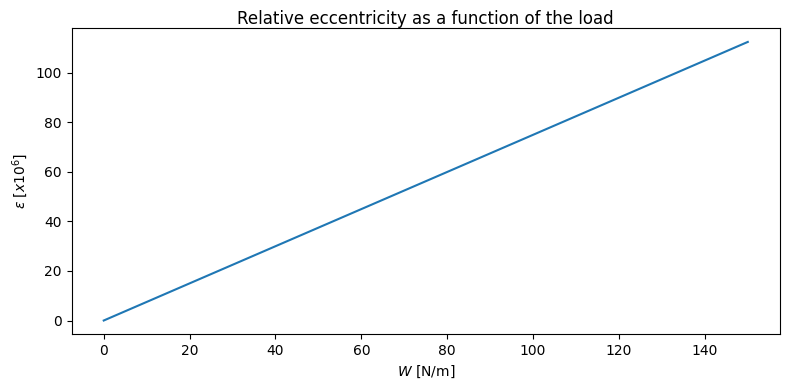

In [23]:
ecc_Array = sp.lambdify((F,h0,Omega,R,mu),ecc[0])
ecc_Array = ecc_Array(W_Array,h0_par,Omega_par,R_par,mu_par)
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(W_Array,ecc_Array*(10**6))
ax.set_xlabel(r'$W$ [N/m]')
ax.set_ylabel(r'$\varepsilon$ [$x10^{6}$]')
ax.set_title("Relative eccentricity as a function of the load", va='top')
fig.tight_layout()

### 2.2. Dynamic movement:

Dynamically, the eccentricity would increase due to de fact that the increased load would push the journal downwards, closer to the wall, and the force would then increase and drift it back to its level position but closer to the wall. The following plots show the process:

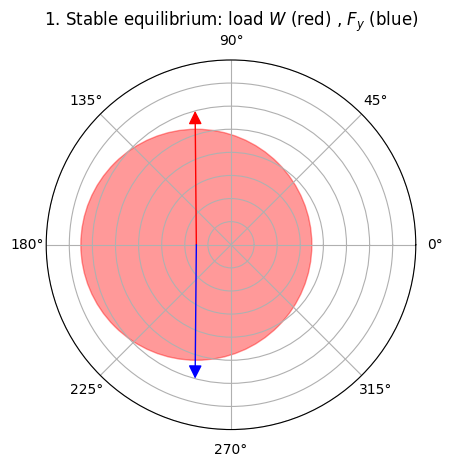

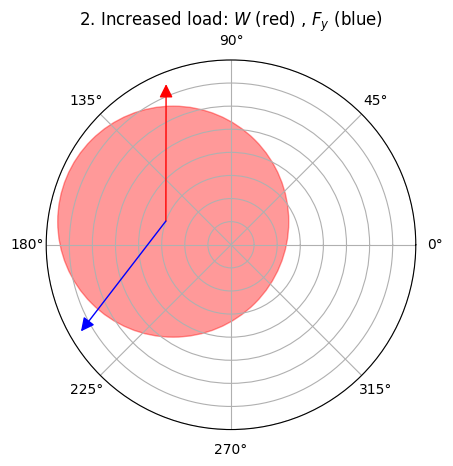

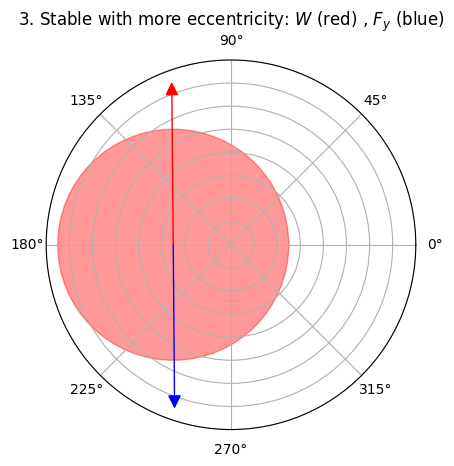

In [24]:
#theta = np.arange(0,361) * np.pi / 180
#rID = np.full((361), 1.6)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rmax(1.6)
ax.set_yticklabels([])
ax.grid(True)
circle=plt.Circle((-0.3, 0.0), 1, transform=ax.transData._b, color="red", alpha=0.4)
ax.add_artist(circle)

propW = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='r',
            shrinkA=0,shrinkB=0)
propFy = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='b',
            shrinkA=0,shrinkB=0)
ax.annotate("", xy=(105/180.*np.pi, 1.2), xytext=(180/180.*np.pi, 0.3), arrowprops=propW)
ax.annotate("", xy=(255/180.*np.pi, 1.2), xytext=(180/180.*np.pi, 0.3), arrowprops=propFy)


ax.set_title(r"1. Stable equilibrium: load $W$ (red) , $F_y$ (blue)", va='top')
plt.show()

# ------------------------------------------------------------------------------------------ #

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rmax(1.6)
ax.set_yticklabels([])
ax.grid(True)
circle=plt.Circle((-0.5, 0.2), 1, transform=ax.transData._b, color="red", alpha=0.4)
ax.add_artist(circle)

propW = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='r',
            shrinkA=0,shrinkB=0)
propFy = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='b',
            shrinkA=0,shrinkB=0)
ax.annotate("", xy=(112/180.*np.pi, 1.5), xytext=(160/180.*np.pi, 0.6), arrowprops=propW)
ax.annotate("", xy=(210/180.*np.pi, 1.5), xytext=(160/180.*np.pi, 0.6), arrowprops=propFy)


ax.set_title(r"2. Increased load: $W$ (red) , $F_y$ (blue)", va='top')
plt.show()

# ------------------------------------------------------------------------------------------ #

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rmax(1.6)
ax.set_yticklabels([])
ax.grid(True)
circle=plt.Circle((-0.5, 0.0), 1, transform=ax.transData._b, color="red", alpha=0.4)
ax.add_artist(circle)

propW = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='r',
            shrinkA=0,shrinkB=0)
propFy = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",color='b',
            shrinkA=0,shrinkB=0)
ax.annotate("", xy=(110/180.*np.pi, 1.5), xytext=(180/180.*np.pi, 0.5), arrowprops=propW)
ax.annotate("", xy=(251/180.*np.pi, 1.5), xytext=(180/180.*np.pi, 0.5), arrowprops=propFy)


ax.set_title(r"3. Stable with more eccentricity: $W$ (red) , $F_y$ (blue)", va='top')
plt.show()

## PART 3: EXAMPLE RESULTS AND MAXIMUM LOAD:
---------------------------

### 3.1. Maximum load and eccentricity:

In the case of the real example, it can be seen that the inner diameter of the journal bearing is of $D_b = 10.01\:mm$ while the diameter of the shaft is of $D_a = 10.00\:mm$. Also, a maximum load of $310\:lbs$ ($140.6136\:kg$) at $120\:rpm$ is declared. The bearing is lubricated with [SAE 30 Oil](https://wiki.anton-paar.com/en/engine-oil/), whose dynamic viscosity at $0ºC$ is of $\mu = 1.1241\:kg/(m\cdot s)$.

According to the previous theoretical results, the expression of load (+y) as the oposite to the force that generates the bearing (in the -y direction) is:

In [25]:
W = sp.symbols('W')
Load = sp.Eq(W,-Fy)
display(Load)

Eq(W, 6*pi*Omega*R**3*mu*varepsilon/h_0**2)

The value of the relative eccentricity $\varepsilon$ can be found:

In [26]:
ect = sp.solve(Load,eps)
display(ect[0])

W*h_0**2/(6*pi*Omega*R**3*mu)

The data is known:

In [27]:
# DATA: (CHECK IF IS CORRECT REGARDING THE EXAMPLE IN THE ASSIGNMENT TEXT)
length_L=10/1000 #[m]
W_par = 140.6136*9.81/length_L #[N/m]
Db_par = 0.01001 #[m]
Da_par = 0.01000 #[m]
h0_par = 0.5*(Db_par-Da_par) #[m]
Omega_par = 120*2*sp.pi/60 #[rad/s]
mu_par = 1.1242 #[kg/(ms)] CHECK THIS VALUE ACCORDING TO SAE 30 OIL
R_par = 0.5*(Da_par/2+Db_par/2) #[m] CHECK THE DEFINITION OF THIS R

The relative eccentricity for this case is:

In [28]:
varepsilon_par = sp.lambdify((W,h0,Omega,R,mu),ect[0])
varepsilon_sol = varepsilon_par(W_par,h0_par,Omega_par,R_par,mu_par)#.simplify()
display(varepsilon_sol)

0.324990267987968/pi

The maximum load of the example journal bearing is clearly $\varepsilon \ll 1$, being the case that it can indeed lift the presented maximum dynamic load capacity of 310 lbs. at 120 rpm. In particular, this relative eccentricity corresponds to the following value of eccentricity $e = \varepsilon h_0$ (in $\mu m$):

In [29]:
ecc_mum = varepsilon_sol*h0_par*10**6
display(ecc_mum)

1.62495133993978/pi

### 3.2. Geometrical height distribution at maximum load

In [30]:
import matplotlib.pyplot as plt

# DATA (initialized before)
eps_par = varepsilon_sol

theta_Array = np.arange(0,361)
h_Array = h0_par*(1+eps_par*np.cos(np.radians(theta_Array)))
ground_Array = np.zeros((len(theta_Array),1))

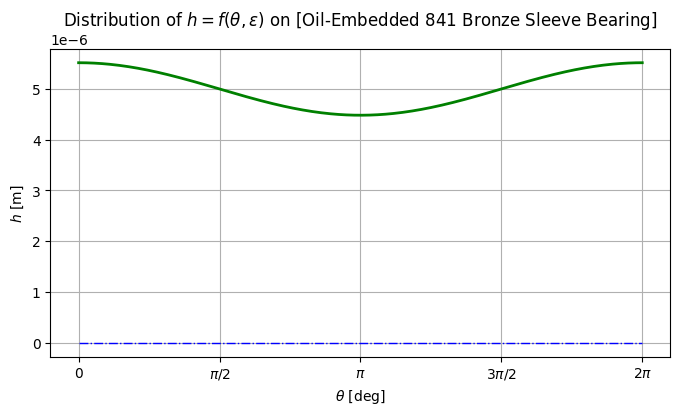

In [31]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(theta_Array,h_Array,'g',label='Height, inner bearing)',linewidth=2)
ax.plot(theta_Array,ground_Array,'b-.',label='Ground, outer bearing',linewidth=1)
#legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$h$ [m]')
ax.set_title(r'Distribution of $h=f(\theta,\epsilon)$ on [Oil-Embedded 841 Bronze Sleeve Bearing]')
ax.xaxis.set_ticks([0, 90, 180, 270, 360]) # exact number and position of tickz
ax.set_xticklabels([r'0',r'$\pi /2$',r'$\pi$',r'$3\pi /2$',r'$2\pi$']) # in place of xlabels, must have same dimensions

ax.grid(which='major',axis='both')

### 3.3. Pressure distribution at maximum load

For standard journal bearings, the oil pressure ranges from 20-35 MPa: [Oil pressure](https://www.machinerylubrication.com/Read/779/journal-bearing-lubrication)

In [32]:
import matplotlib.pyplot as plt

# DATA (initialized before)
p0_par = 20e6 #[Pa] 150 PSI standard pressure for lubrication on jounral bearings 

theta_Array = np.arange(0,361)
p_sol_lamb = sp.lambdify((Omega,R,mu,eps,theta,h0,p0),p_sol.rhs)

theta_Array = np.arange(0,361) * np.pi / 180
p0_Array = p_sol_lamb (Omega_par,R_par,mu_par,varepsilon_sol*0/4,theta_Array,h0_par,p0_par)
p1_Array = p_sol_lamb (Omega_par,R_par,mu_par,varepsilon_sol*1/4,theta_Array,h0_par,p0_par)
p2_Array = p_sol_lamb (Omega_par,R_par,mu_par,varepsilon_sol*2/4,theta_Array,h0_par,p0_par)
p3_Array = p_sol_lamb (Omega_par,R_par,mu_par,varepsilon_sol*3/4,theta_Array,h0_par,p0_par)
p4_Array = p_sol_lamb (Omega_par,R_par,mu_par,varepsilon_sol*4/4,theta_Array,h0_par,p0_par)

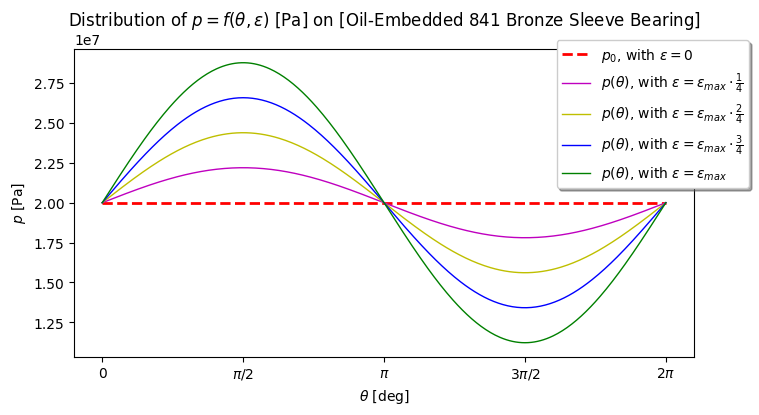

In [33]:
fig,ax = plt.subplots(figsize=(8,4))
ax.grid(True)
ax.plot(theta_Array,p0_Array,'r--',label=r'$p_0$, with $\varepsilon=0$ ',linewidth=2)
ax.plot(theta_Array,p1_Array,'m',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{1}{4}$',linewidth=1)
ax.plot(theta_Array,p2_Array,'y',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{2}{4}$',linewidth=1)
ax.plot(theta_Array,p3_Array,'b',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{3}{4}$',linewidth=1)
ax.plot(theta_Array,p4_Array,'g',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max}$',linewidth=1)
ax.set_title(r'Distribution of $p=f(\theta,\epsilon)$ [Pa] on [Oil-Embedded 841 Bronze Sleeve Bearing]')
legend = ax.legend(loc='best', bbox_to_anchor=(1.1, 1.05), shadow=True)
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$p$ [Pa]')
ax.xaxis.set_ticks([0, np.pi/2, np.pi, np.pi*3/2, np.pi*2]) # exact number and position of tickz
ax.set_xticklabels([r'0',r'$\pi /2$',r'$\pi$',r'$3\pi /2$',r'$2\pi$']) # in place of xlabels, must have same dimensions
ax.grid(which='major',axis='both')

Ilustrating on a polar plot (as the physical representation of the journal where the pressure acts) the same results:

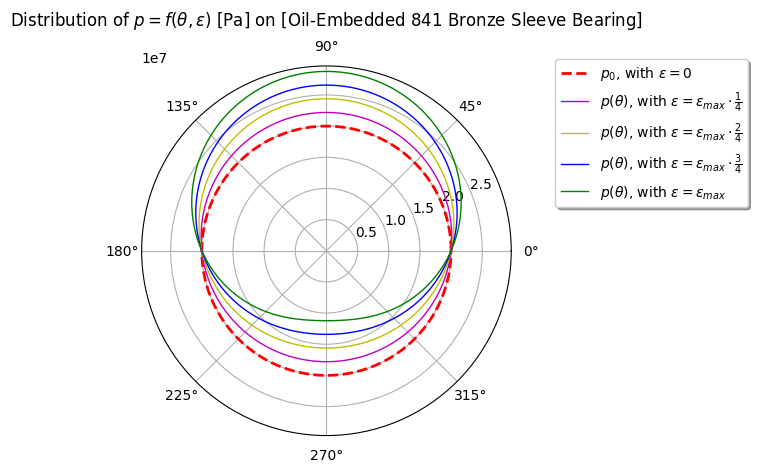

In [34]:
theta_Array = np.arange(0,361) * np.pi / 180

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.set_rmax(1.6)
#ax.set_yticklabels([])
ax.grid(True)
ax.plot(theta_Array,p0_Array,'r--',label=r'$p_0$, with $\varepsilon=0$ ',linewidth=2)
ax.plot(theta_Array,p1_Array,'m',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{1}{4}$',linewidth=1)
ax.plot(theta_Array,p2_Array,'y',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{2}{4}$',linewidth=1)
ax.plot(theta_Array,p3_Array,'b',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max} \cdot \frac{3}{4}$',linewidth=1)
ax.plot(theta_Array,p4_Array,'g',label=r'$p(\theta)$, with $\varepsilon=\varepsilon_{max}$',linewidth=1)
ax.set_title(r'Distribution of $p=f(\theta,\epsilon)$ [Pa] on [Oil-Embedded 841 Bronze Sleeve Bearing]', va='bottom')

angle = np.deg2rad(0)
legend = ax.legend(loc='lower left', bbox_to_anchor=(0.6 + np.cos(angle)/2, 0.6 + np.sin(angle)/2), shadow=True)
plt.show()

-------------------------------
# END : Assignment 1
-------------------------------

In [35]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 8.10.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.4.0-144-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

numpy     : 1.24.2
sympy     : 1.5.1
matplotlib: 3.7.1

